In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
rootdir = Path().resolve().parent
exptdir = rootdir / "scripts/lagfeature_sharpratio/out"

In [54]:
def plot_reward(fold: int):
    folddir = exptdir / f"fold{fold}" / "log"
    dfl = pd.read_csv(folddir / "progress.csv")
    
    x = dfl["time/total_timesteps"]
    yt, ye = dfl["rollout/ep_rew_mean"], dfl["eval/mean_reward"]
    xt, xe = x.loc[~yt.isnull()], x.loc[~ye.isnull()]
    yt, ye = yt.loc[~yt.isnull()], ye.loc[~ye.isnull()]
    
    fig = make_subplots(rows=2, cols=1)

    fig.add_trace(go.Scatter(
        x=xt.values,
        y=yt.values,
        name="train",
    ), row=1, col=1)
    fig.add_trace(go.Scatter(
        x=xe.values,
        y=ye.values,
        name="eval"
    ), row=2, col=1)

    fig.update_yaxes(title="train reward", row=1, col=1)
    fig.update_yaxes(title="eval reward", row=2, col=1)
    fig.update_xaxes(title="num of steps", row=2, col=1)
    fig.update_layout(title=f"fold{fold}", width=1200, height=600)
    fig.show()

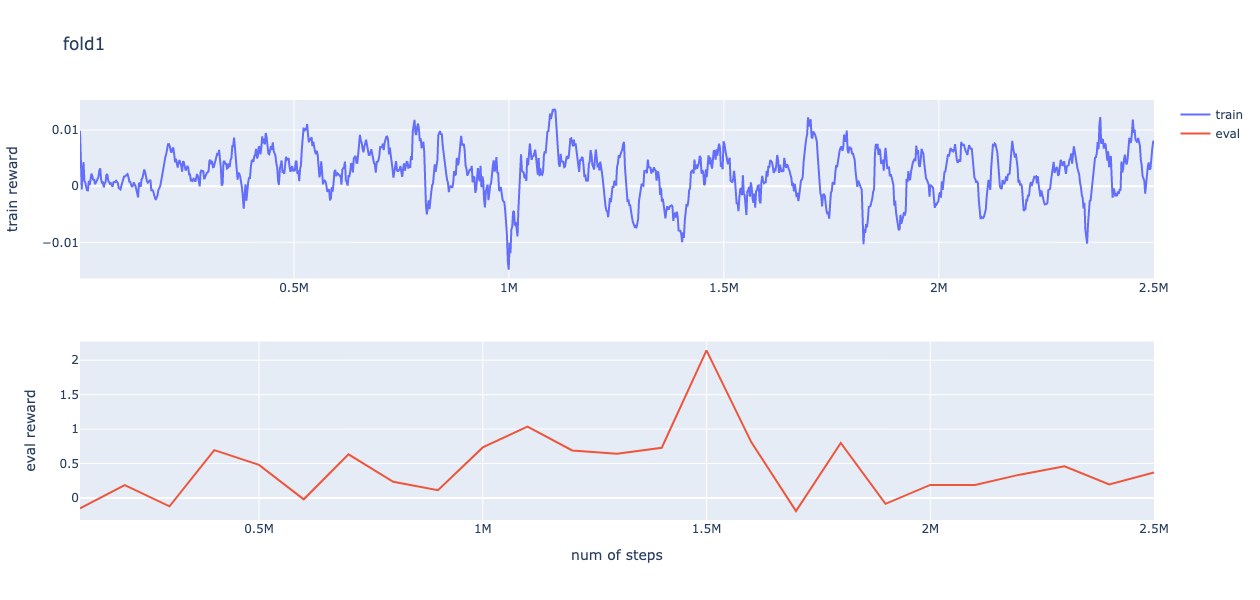

In [55]:
plot_reward(1)

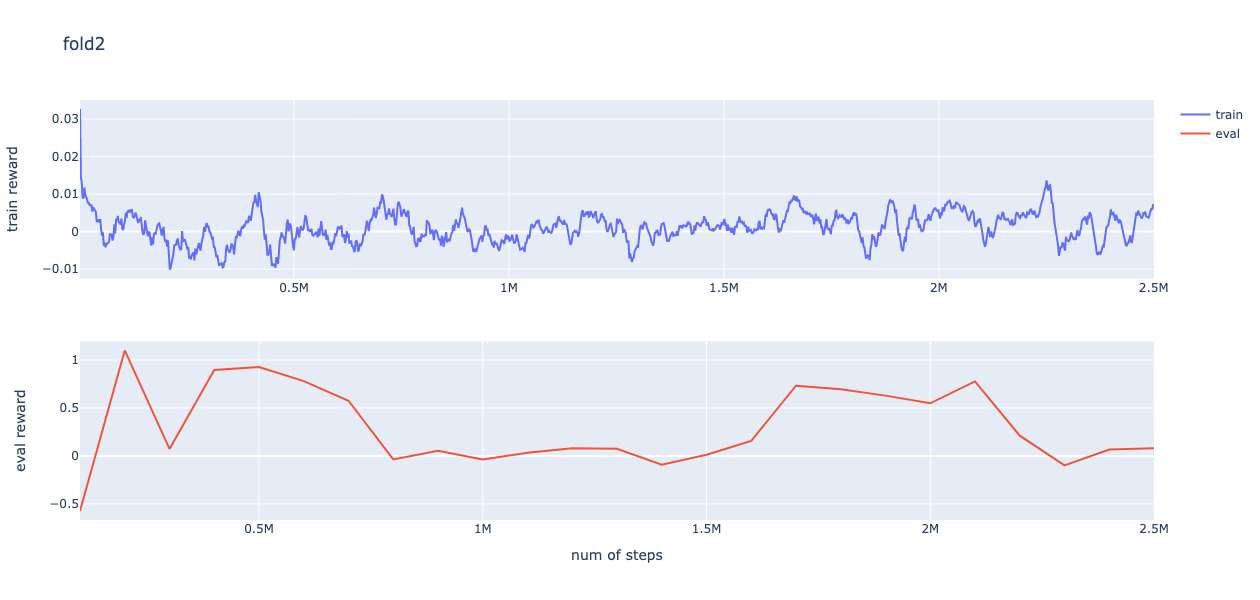

In [56]:
plot_reward(2)

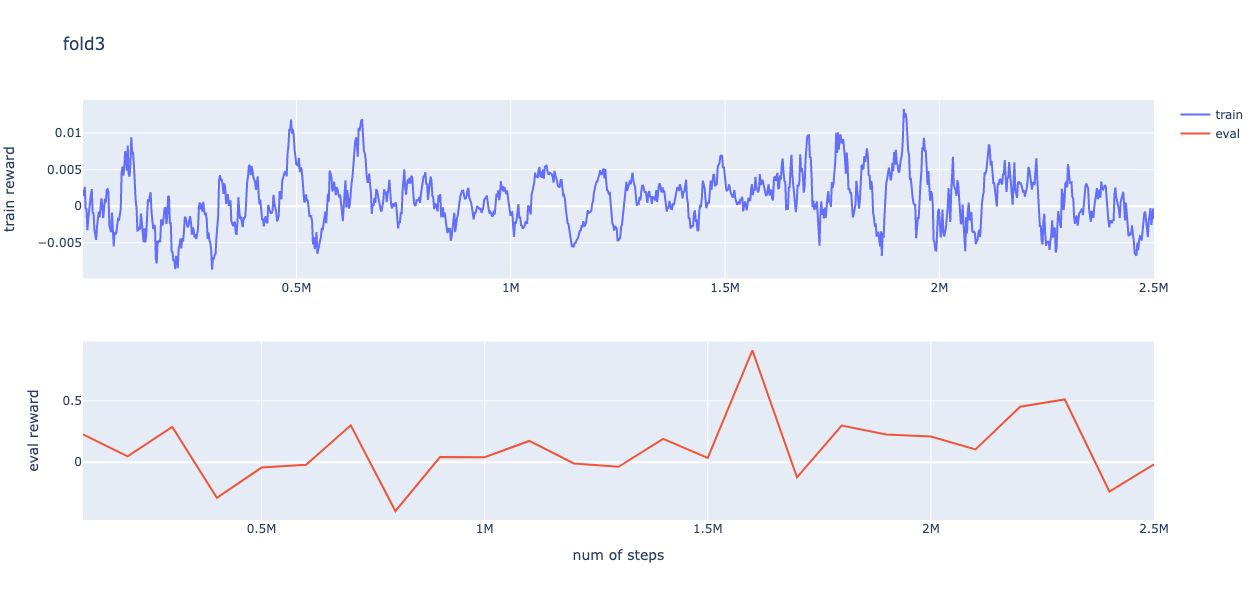

In [57]:
plot_reward(3)